<a href="https://colab.research.google.com/github/deshanchathusanka/optimisation/blob/main/optimizer_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. $\color{Blue}{\text{Installations}}$

In [ ]:
import numpy as np
import doctest
import math
import time
import matplotlib.pyplot as plt

from scipy.stats import truncnorm
from scipy.stats import kstest
from scipy import stats

# 2. $\color{Blue}{\text{Function Definitions}}$

## 2.1 $\color{Blue}{\text{Function Counter Decorator}}$

In [ ]:
def count(fn):
  '''
  This is a decorator function to count number of function executions
  fn : function
  '''
  def decorated_fn(*args, **kwargs):
    decorated_fn.execution += 1
    return fn(*args, **kwargs)
  decorated_fn.execution = 0
  return decorated_fn

## 2.2 $\color{Blue}{\text{Implementations of Equations}}$

### 2.2.1 $\color{Red}{f(x) = 1.10471 x1^2 x2 + 0.04811x3x4(14.0 + x2)}$

In [ ]:
@count # f = count(f)
def f(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  [x1, x2, x3, x4] = x_np
  f_x = 1.10471*x1*x1*x2 + 0.04811*x3*x4*(14.0 + x2)
  return f_x

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
f(x_np)
f(x_np)
print(f'Number of executions = {f.execution}')


########## Testing execution count ############

Number of executions = 2


### 2.2.2 ${\color{Blue}{\tau' = \frac{6000}{\sqrt{2}x1x2}}}$

In [ ]:
@count # t1 = count(t1)
def t1(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  [x1, x2, x3, x4] = x_np
  _t1 = 6000/(math.sqrt(2)*x1*x2)
  return _t1

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
t1(x_np)
t1(x_np)
print(f'Number of executions = {t1.execution}')

assert round(t1(x_np), 2) == 2121.32


########## Testing execution count ############

Number of executions = 2


### 2.2.3 $\color{Blue}{\tau'' = \frac{6000(14+0.5x_2)\sqrt{0.25(x_2^2+(x_1+x_3)^2)}}{2(0.707x_1x_2(\frac{x_2^2}{12}+0.25(x_1+x_3)^2))}}$

In [ ]:
@count # t2 = count(t2)
def t2(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  [x1, x2, x3, x4] = x_np
  numerator = 6000*(14 + 0.5*x2)*math.sqrt(0.25*(x2**2 + (x1+x3)**2))
  denominator = 2*(0.707*x1*x2*(((x2**2)/12) + 0.25*((x1+x3)**2))) 

  if denominator == 0 :
    raise RuntimeWarning("Error")

  _t2 = numerator/denominator
  return _t2

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
t2(x_np)
t2(x_np)
t2(x_np)
print(f'Number of executions = {t2.execution}')

assert round(t2(x_np)) == 16422.00


########## Testing execution count ############

Number of executions = 3


### 2.2.4 $\color{Blue}{\tau = \sqrt{(\tau'^2+\tau''^2) + \frac{x_2\tau'\tau''}{\sqrt{0.25(x_2^2 + (x_1 + x_3)^2)}}}}$

In [ ]:
@count
def t(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  [x1, x2, x3, x4] = x_np
  _t1 = t1(x_np)
  _t2 = t2(x_np)
  _t = math.sqrt((_t1**2 + _t2**2) 
  + ((x2*_t1*_t2)/math.sqrt(0.25*(x2**2 + (x1 + x3)**2))))

  return _t

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
t(x_np)
t(x_np)
t(x_np)
print(f'Number of executions = {t.execution}')

_t = t(x_np)
assert round(_t, 2) == 17474.00, 'functional issue'


########## Testing execution count ############

Number of executions = 3


### 2.2.5 $\color{Blue}{\sigma = \frac{504000}{x_3^2x_4}}$

In [ ]:
@count
def sigmaf(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  [x1, x2, x3, x4] = x_np
  _sigma = 504000/((x3**2)*x4)

  return _sigma

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
sigmaf(x_np)
sigmaf(x_np)
sigmaf(x_np)
print(f'Number of executions = {sigmaf.execution}')

assert round(sigmaf(x_np)) == 14000, 'functional issue'


########## Testing execution count ############

Number of executions = 3


### 2.2.6 $\color{Blue}{p = 64746.022(1 - 0.0282346x_3)x_3x_4^3}$

In [ ]:
@count
def p(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  [x1, x2, x3, x4] = x_np
  _p = 64746.022*(1 - 0.0282346*x3)*x3*(x4**3)

  return _p

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
p(x_np)
p(x_np)
p(x_np)
print(f'Number of executions = {p.execution}')

assert round(p(x_np), 2) == 11378263.28, 'functional issue'


########## Testing execution count ############

Number of executions = 3


### 2.2.7 $\color{Red}{g_1(x) = 13600 - \tau(x)}$

In [ ]:
@count
def g1(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  _t = t(x_np)
  _g1 = 13600 - _t

  return _g1

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
g1(x_np)
g1(x_np)
g1(x_np)
print(f'Number of executions = {g1.execution}')

assert round(g1(x_np), 2) == -3874, 'functional issue'


########## Testing execution count ############

Number of executions = 3


### 2.2.8 $\color{Red}{g_2(x)=30000-σ(x)}$

In [ ]:
@count
def g2(x_np):
  _sigma = sigmaf(x_np)
  _g2 = 30000 - _sigma

  return _g2


########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
g2(x_np)
g2(x_np)
g2(x_np)
print(f'Number of executions = {g2.execution}')

assert round(g2(x_np), 2) == 16000, 'functional issue'


########## Testing execution count ############

Number of executions = 3


### 2.2.9 $\color{Red}{g_3(x) = x_4-x_1}$

In [ ]:
@count
def g3(x_np):
  [x1, x2, x3, x4] = x_np
  _g3 = x4 - x1
  return _g3

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
g3(x_np)
g3(x_np)
g3(x_np)
print(f'Number of executions = {g3.execution}')

assert round(g3(x_np)) == 3, 'functional issue'


########## Testing execution count ############

Number of executions = 3


### 2.2.10 $\color{Red}{g_4(x)=p-6000}$

In [ ]:
@count
def g4(x_np):
  _p = p(x_np)
  _g4 = _p - 6000

  return _g4

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
g4(x_np)
g4(x_np)
g4(x_np)
print(f'Number of executions = {g4.execution}')

assert round(g4(x_np), 2) == 11372263.28, 'functional issue'


########## Testing execution count ############

Number of executions = 3


In [ ]:
x = np.array([1.05, 3.15, 4.43, 7.87])
print('Objective Function Output : ', f(x))
print('First Constraint Function Output : ', g1(x))
print('Second Constraint Function Output : ', g2(x))
print('Third Constraint Function Output : ', g3(x))
print('Forth Constraint Function Output : ', g4(x))

assert round(f(x), 3) == 32.602
assert round(g1(x), 3) == 5308.849
assert round(g2(x), 3) == 26736.7650
assert round(g3(x), 3) == 6.82
assert round(g4(x), 3) == 122317448.614

Objective Function Output :  32.6024179859
First Constraint Function Output :  5308.848564674312
Second Constraint Function Output :  26736.764990548952
Third Constraint Function Output :  6.82
Forth Constraint Function Output :  122317448.61430933


# 3 $\color{Blue}{\text{Constraints}}$



1. $\color{Red}{g_1(x), g_2(x), g_3(x), g_4(x) \ge 0}$
2. $\color{Red}{x_1,x_2 \in [0.125, 5]}$
3. $\color{Red}{x_3, x_4 \in [0.1, 10]}$



In [ ]:
def pi_static(x_np, r, beta):
  _pi_static = f(x_np) + r*abs((min(0, g1(x_np))**beta)) + r*abs((min(0, g2(x_np))**beta)) + r*abs((min(0, g3(x_np))**beta)) + r*abs((min(0, g4(x_np))**beta))
  return _pi_static

########### unit testing #############
x_np = [2, 4, 5, 7]
print(pi_static(x_np, 30, 2))

47.98466


# 4. $\color{Blue}{\text{Random Search}}$

In [ ]:
def random_search(no_samples, lb, ub):
  '''
  no_samples = Number of samples
  Description = Implementation of Random Search
  '''
  ############### generate samples ##############
  x_np_candidates = np.random.uniform(low = lb, high = ub, size = (no_samples, 4))

  ################ execute random search with selected candidates ###############
  # f_values = [f(x_np) for x_np in x_np_candidates]
  f_values = [pi_static(x_np, 20, 1) for x_np in x_np_candidates]
  f_min_index = np.argmin(f_values)
  x_np_min = x_np_candidates[f_min_index]
  f_min = f_values[f_min_index]
  return x_np_min, f_min

start = time.perf_counter()
n_samples = 1000
lb, ub = np.array([0.125, 0.125, 0.1, 0.1]), np.array([5, 5, 10, 10])
[x_np_min, f_min] = random_search(n_samples, lb, ub) 
end = time.perf_counter()

print(f'Optimal Value : {x_np_min}')
print(f'Minimum Function Value : {f_min}')
print(f'Execution Time : {round((end - start)*1000, 2)}ms')

assert f.execution < 10000
assert g1.execution < 10000
assert g2.execution < 10000
assert g3.execution < 10000
assert g4.execution < 10000

Optimal Value : [0.86862444 2.00275362 5.390651   1.11732181]
Minimum Function Value : 6.306454317204764
Execution Time : 27.38ms


In [ ]:
n_repeat = 21
n_samples = 1000
lb, ub = np.array([0.125, 0.125, 0.1, 0.1]), np.array([5, 5, 10, 10])
start = time.perf_counter()
random_search_repeat_results = np.array([random_search(n_samples, lb, ub) for i in range(n_repeat)])
end = time.perf_counter()

min_cost_param_index = np.argmin(random_search_repeat_results[:, -1])
min_cost_param = random_search_repeat_results[min_cost_param_index][0]
min_cost = random_search_repeat_results[min_cost_param_index][1]
print(f'Execution Time : {round((end - start)*1000, 2)}ms')
print(f'Minimum Cost : {min_cost}')
print(f'Minimum Cost Param : {min_cost_param}')

assert len(random_search_repeat_results) == 21
# assert g1.execution < 10000, f'g1(x) has been executed more than allowed: {g1.execution}'

Execution Time : 499.91ms
Minimum Cost : 3.9283117177267988
Minimum Cost Param : [0.4451426  3.49996622 7.09491736 0.52937689]


<ipython-input-34-c2f97bc24582>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  random_search_repeat_results = np.array([random_search(n_samples, lb, ub) for i in range(n_repeat)])


In [ ]:
assert g1(min_cost_param)>0
assert g2(min_cost_param)>0
assert g3(min_cost_param)>0
assert g4(min_cost_param)>0

In [ ]:
plt.figure()
plt.boxplot(random_search_repeat_results[:, -1])
plt.show()

# 5. $\color{Blue}{\text{Simulated Annealing}}$

In [ ]:
f.execution = 0
g1.execution = 0
g2.execution = 0
g3.execution = 0
g4.execution = 0

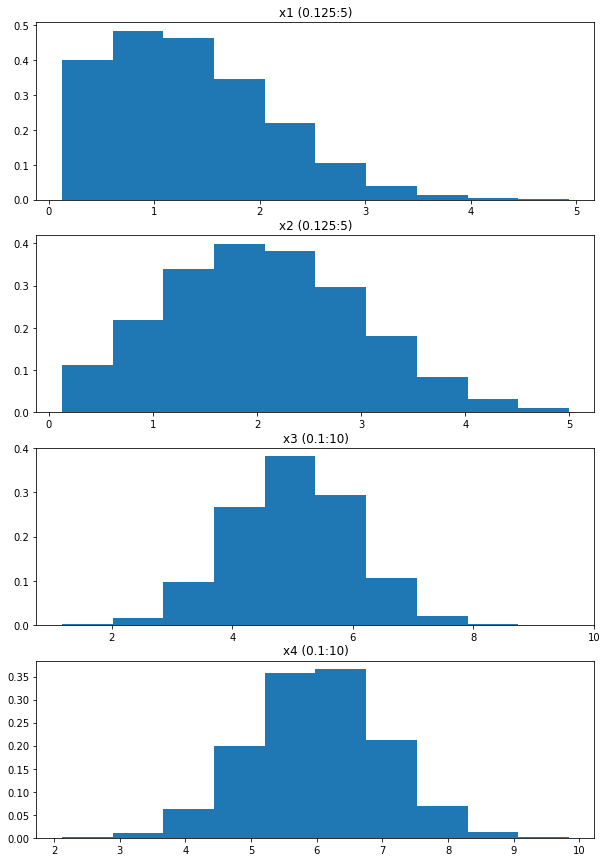

In [ ]:
def generate_truncate_rvs(lb, ub, mu, sigma, n_samples = 1):
  '''
  lb : lower bound
  up : upper bound
  mu : mean
  sigma : standard deviation
  n_samples : number of samples
  '''
  a = (lb - mu)/sigma
  b = (ub - mu)/sigma
  d = len(a)

  r_normalised = truncnorm.rvs(a, b, size = (n_samples, d))
  r_scaled = (r_normalised * sigma) + mu
  return r_scaled


#################### unit testing #################
lb, ub = np.array([0.125, 0.125, 0.1, 0.1]), np.array([5, 5, 10, 10])
mu = np.array([1, 2, 5, 6])
sigma = np.array([1, 1, 1, 1])
n_samples = 20000
truncated_rvs = generate_truncate_rvs(lb, ub, mu, sigma, n_samples)

plt.figure(figsize = (10, 15))
ax = plt.subplot(4, 1, 1)
ax.set_title('x1 (0.125:5)')
ax.hist(truncated_rvs[:, 0], density = True)

ax = plt.subplot(4, 1, 2)
ax.set_title('x2 (0.125:5)')
ax.hist(truncated_rvs[:, 1], density = True)

ax = plt.subplot(4, 1, 3)
ax.set_title('x3 (0.1:10)')
ax.hist(truncated_rvs[:, 2], density = True)

ax = plt.subplot(4, 1, 4)
ax.set_title('x4 (0.1:10)')
ax.hist(truncated_rvs[:, 3], density = True)
plt.show()


In [ ]:
def fast_cf(ti, k):
  return ti/k

In [ ]:
def log_cf(ti, k):
  return ti*(np.log(2)/np.log(k+1))

In [ ]:
def simulated_annealing(n_samples, lb, ub, cooling_fn):
  '''
  no_samples : Number of samples
  Description : Implementation of simulated annealing
  '''
  sigma = np.array([1, 1, 1, 1])

  x_best = np.random.uniform(low = lb, high = ub)
  # y_best = f(x_best)
  y_best = pi_static(x_best, 30, 2)

  x_c = x_best
  y_c = y_best

  t_i = 100 # initial temperature
  for k in range(n_samples):
    t_k = cooling_fn(t_i, k+1) # fast annealing model
    x_prime = generate_truncate_rvs(lb, ub, x_c, sigma)
    x_prime = np.transpose(x_prime[0])
    y_prime = f(x_prime)
    y_prime = pi_static(x_prime, 30, 2)
    delta_y = y_prime - y_c

    p = min(np.exp(-delta_y/t_k), 1)
    p_accepted = np.random.uniform(0, 1, 1)
    if(delta_y <= 0) or (p_accepted < p): # exploitation and exploration
      x_c, y_c = x_prime, y_prime

    if(y_prime < y_best):
      x_best, y_best = x_prime, y_prime
      

  return x_best, y_best

n_samples = 1000
lb, ub = [0.125, 0.125, 0.1, 0.1], [5, 5, 10, 10]
start = time.perf_counter()
simulated_annealing(n_samples, lb, ub, fast_cf)
[x_np_min, f_min] = simulated_annealing(n_samples, lb, ub, fast_cf)
end = time.perf_counter()

print(f'Optimal value : {x_np_min}')
print(f'Execution Time : {end} - {start}')

assert f.execution < 10000
assert g1.execution < 10000
assert g2.execution < 10000
assert g3.execution < 10000
assert g4.execution < 10000

Optimal value : [0.38656945 3.56949324 9.38203823 0.30376301]
Execution Time : 181.453457913 - 180.232765959


In [ ]:
n_repeat = 21
n_samples = 1000
lb, ub = np.array([0.125, 0.125, 0.1, 0.1]), np.array([5, 5, 10, 10])
start = time.perf_counter()
simulated_annealing_results = np.array([simulated_annealing(n_samples, lb, ub, fast_cf) for i in range(n_repeat)])
end = time.perf_counter()

min_cost_param_index = np.argmin(simulated_annealing_results[:, -1])
min_cost_param = simulated_annealing_results[min_cost_param_index][0]
min_cost = simulated_annealing_results[min_cost_param_index][1]
print(f'Execution Time : {round((end - start)*1000, 2)}ms')
print(f'Minimum Cost : {min_cost}')
print(f'Minimum Cost Param : {min_cost_param}')

<ipython-input-40-1ad0f54a1575>:24: RuntimeWarning: overflow encountered in exp
  p = min(np.exp(-delta_y/t_k), 1)


Execution Time : 18152.63ms
Minimum Cost : 2.611275849759678
Minimum Cost Param : [0.34639583 4.11107938 8.07157991 0.26674496]


<ipython-input-41-4a5d3e7a8a2a>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  simulated_annealing_results = np.array([simulated_annealing(n_samples, lb, ub, fast_cf) for i in range(n_repeat)])


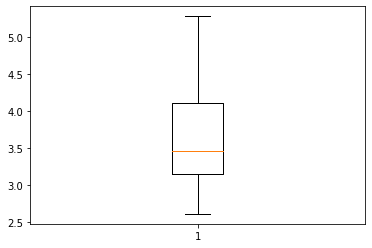

In [ ]:
plt.figure()
plt.boxplot(simulated_annealing_results[:, -1])
plt.show()

# 4. $\color{Blue}{\text{Performance Comparison}}$

## 4.1 $\color{Blue}{\text{Box Plot}}$

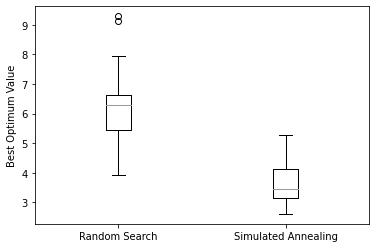

In [ ]:
plt.figure()
plt.boxplot([random_search_repeat_results[:, -1], simulated_annealing_results[:, -1]])
plt.xticks([1,2],['Random Search', 'Simulated Annealing'])
plt.ylabel('Best Optimum Value')
plt.show()

* Simulated Annearling has the minimum median cost with the narrowest interquartile distance as depicted in the boxplot. 
* Therefore, Simulated Annealing is better than Random Search for this optimisation problem considering the boxplot statistics.

## 4.2 $\color{Blue}{\text{Parametric Test(Kolmogorov-Smirnov)}}$

In [ ]:
rs_dist = random_search_repeat_results[:, -1].astype(float)
sa_dist = simulated_annealing_results[:, -1].astype(float)

rs_kstest = stats.kstest(rs_dist, stats.norm.cdf)
sa_kstest = stats.kstest(sa_dist, stats.norm.cdf)

print(f'P value for [Random Search == Normal Distribution] : {rs_kstest.pvalue}')
print(f'P value for [Simulated Annealing == Normal Distribution] : {sa_kstest.pvalue}')

P value for [Random Search == Normal Distribution] : 3.5926190665712e-92
P value for [Simulated Annealing == Normal Distribution] : 1.0945939189564214e-49


## 4.3 $\color{Blue}{\text{Nonparametric Statistical Test(Mann-Whitney)}}$

* Null Hypothesis : Simulated Annealing and Random Search have similar performance.
* Alternative Hypothesis : Simulated Annealing outperforms Random Search(Random Search has higher value than Simulated Annearling).
* Alpha value : 0.05

In [ ]:
mw_test = stats.mannwhitneyu(rs_dist, sa_dist, alternative = 'greater') # null hypothesis >>> performance(random search) < performance(simulated annealing)
print(f'P value for [performance(random search) < performance(simulated annealing)]: {mw_test.pvalue}')

P value for [performance(random search) < performance(simulated annealing)]: 1.8727292148981977e-07


$\color{Red}{\text{The mann-whitney test depicts p value <<< α(0.05). Therefore, null hypothesis can be rejected. Simulated Annealing outperformed the Random Search in this optimisation problem(Random Search has a greater value than Simulated Annearling).}}$

# 5. $\color{Blue}{\text{Hyperparameter Tuning}}$

In [ ]:
candidate_cooling_fn = [fast_cf, log_cf]
performences = []

for cooling_fn in candidate_cooling_fn:
  simulated_annealing_results = np.array([simulated_annealing(n_samples, lb, ub, cooling_fn) for i in range(n_repeat)])
  performences.append(simulated_annealing_results[:, -1])

<ipython-input-40-1ad0f54a1575>:24: RuntimeWarning: overflow encountered in exp
  p = min(np.exp(-delta_y/t_k), 1)
<ipython-input-53-5c8625ebaa33>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  simulated_annealing_results = np.array([simulated_annealing(n_samples, lb, ub, cooling_fn) for i in range(n_repeat)])


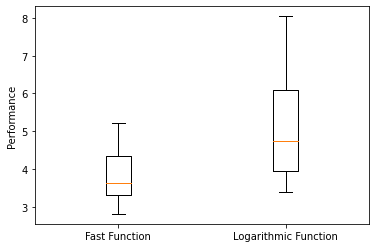

In [ ]:
plt.figure()
plt.boxplot(performences)
plt.xticks([1, 2], ['Fast Function', 'Logarithmic Function'])
plt.ylabel('Performance')
plt.show()

In [ ]:
fast_cf_dist = performences[0].astype(float)
log_cf_dist = performences[1].astype(float)

fast_cf_kstest = kstest(fast_cf_dist, stats.norm.cdf)
log_cf_kstest = kstest(log_cf_dist, stats.norm.cdf)

print(f'P value of [Fast Cooling Function Distribution ~ Normal Disribution] : {fast_cf_kstest.pvalue}')
print(f'P value of [Logarithmic Cooling Function Distribution ~ Normal Disribution] : {log_cf_kstest.pvalue}')

P value of [Fast Cooling Function Distribution ~ Normal Disribution] : 3.301816770717753e-55
P value of [Logarithmic Cooling Function Distribution ~ Normal Disribution] : 5.359091289814628e-73


* Null Hypothesis : Fast cooling function and Logarithmic cooling function have similar performance.
* Alternative Hypothesis : Fast cooling function outperforms Logarithmic function.
* Alpha value : 0.05

In [ ]:
cf_mw_test = stats.mannwhitneyu(fast_cf_dist, log_cf_dist, alternative = 'less')
print(f'P value of [performance(fast cooling function) > performance(logarithmic function)] : {cf_mw_test.pvalue}')

P value of [performance(fast cooling function) > performance(logarithmic function)] : 0.0004914049442277145


$\color{Red}{\text{The mann-whitney test depicts p value <<< α(0.05). Therefore, null hypothesis can be rejected. Fast cooling function outperforms Logarithmic cooling function in this optimisation problem(Fast colling function has a less value than Logarithmic cooling function).}}$